dataset:https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [1]:
#This step is done to connect the content directory to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **EDA**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
hotel_reservations=pd.read_csv("/content/drive/MyDrive/Data_mining PA2/Hotel Reservations.csv")
hotel_reservations.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [13]:
hotel_reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [14]:
hotel_reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


categorical data

categorical_columns = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
    'arrival_year', 'market_segment_type', 'repeated_guest',
]

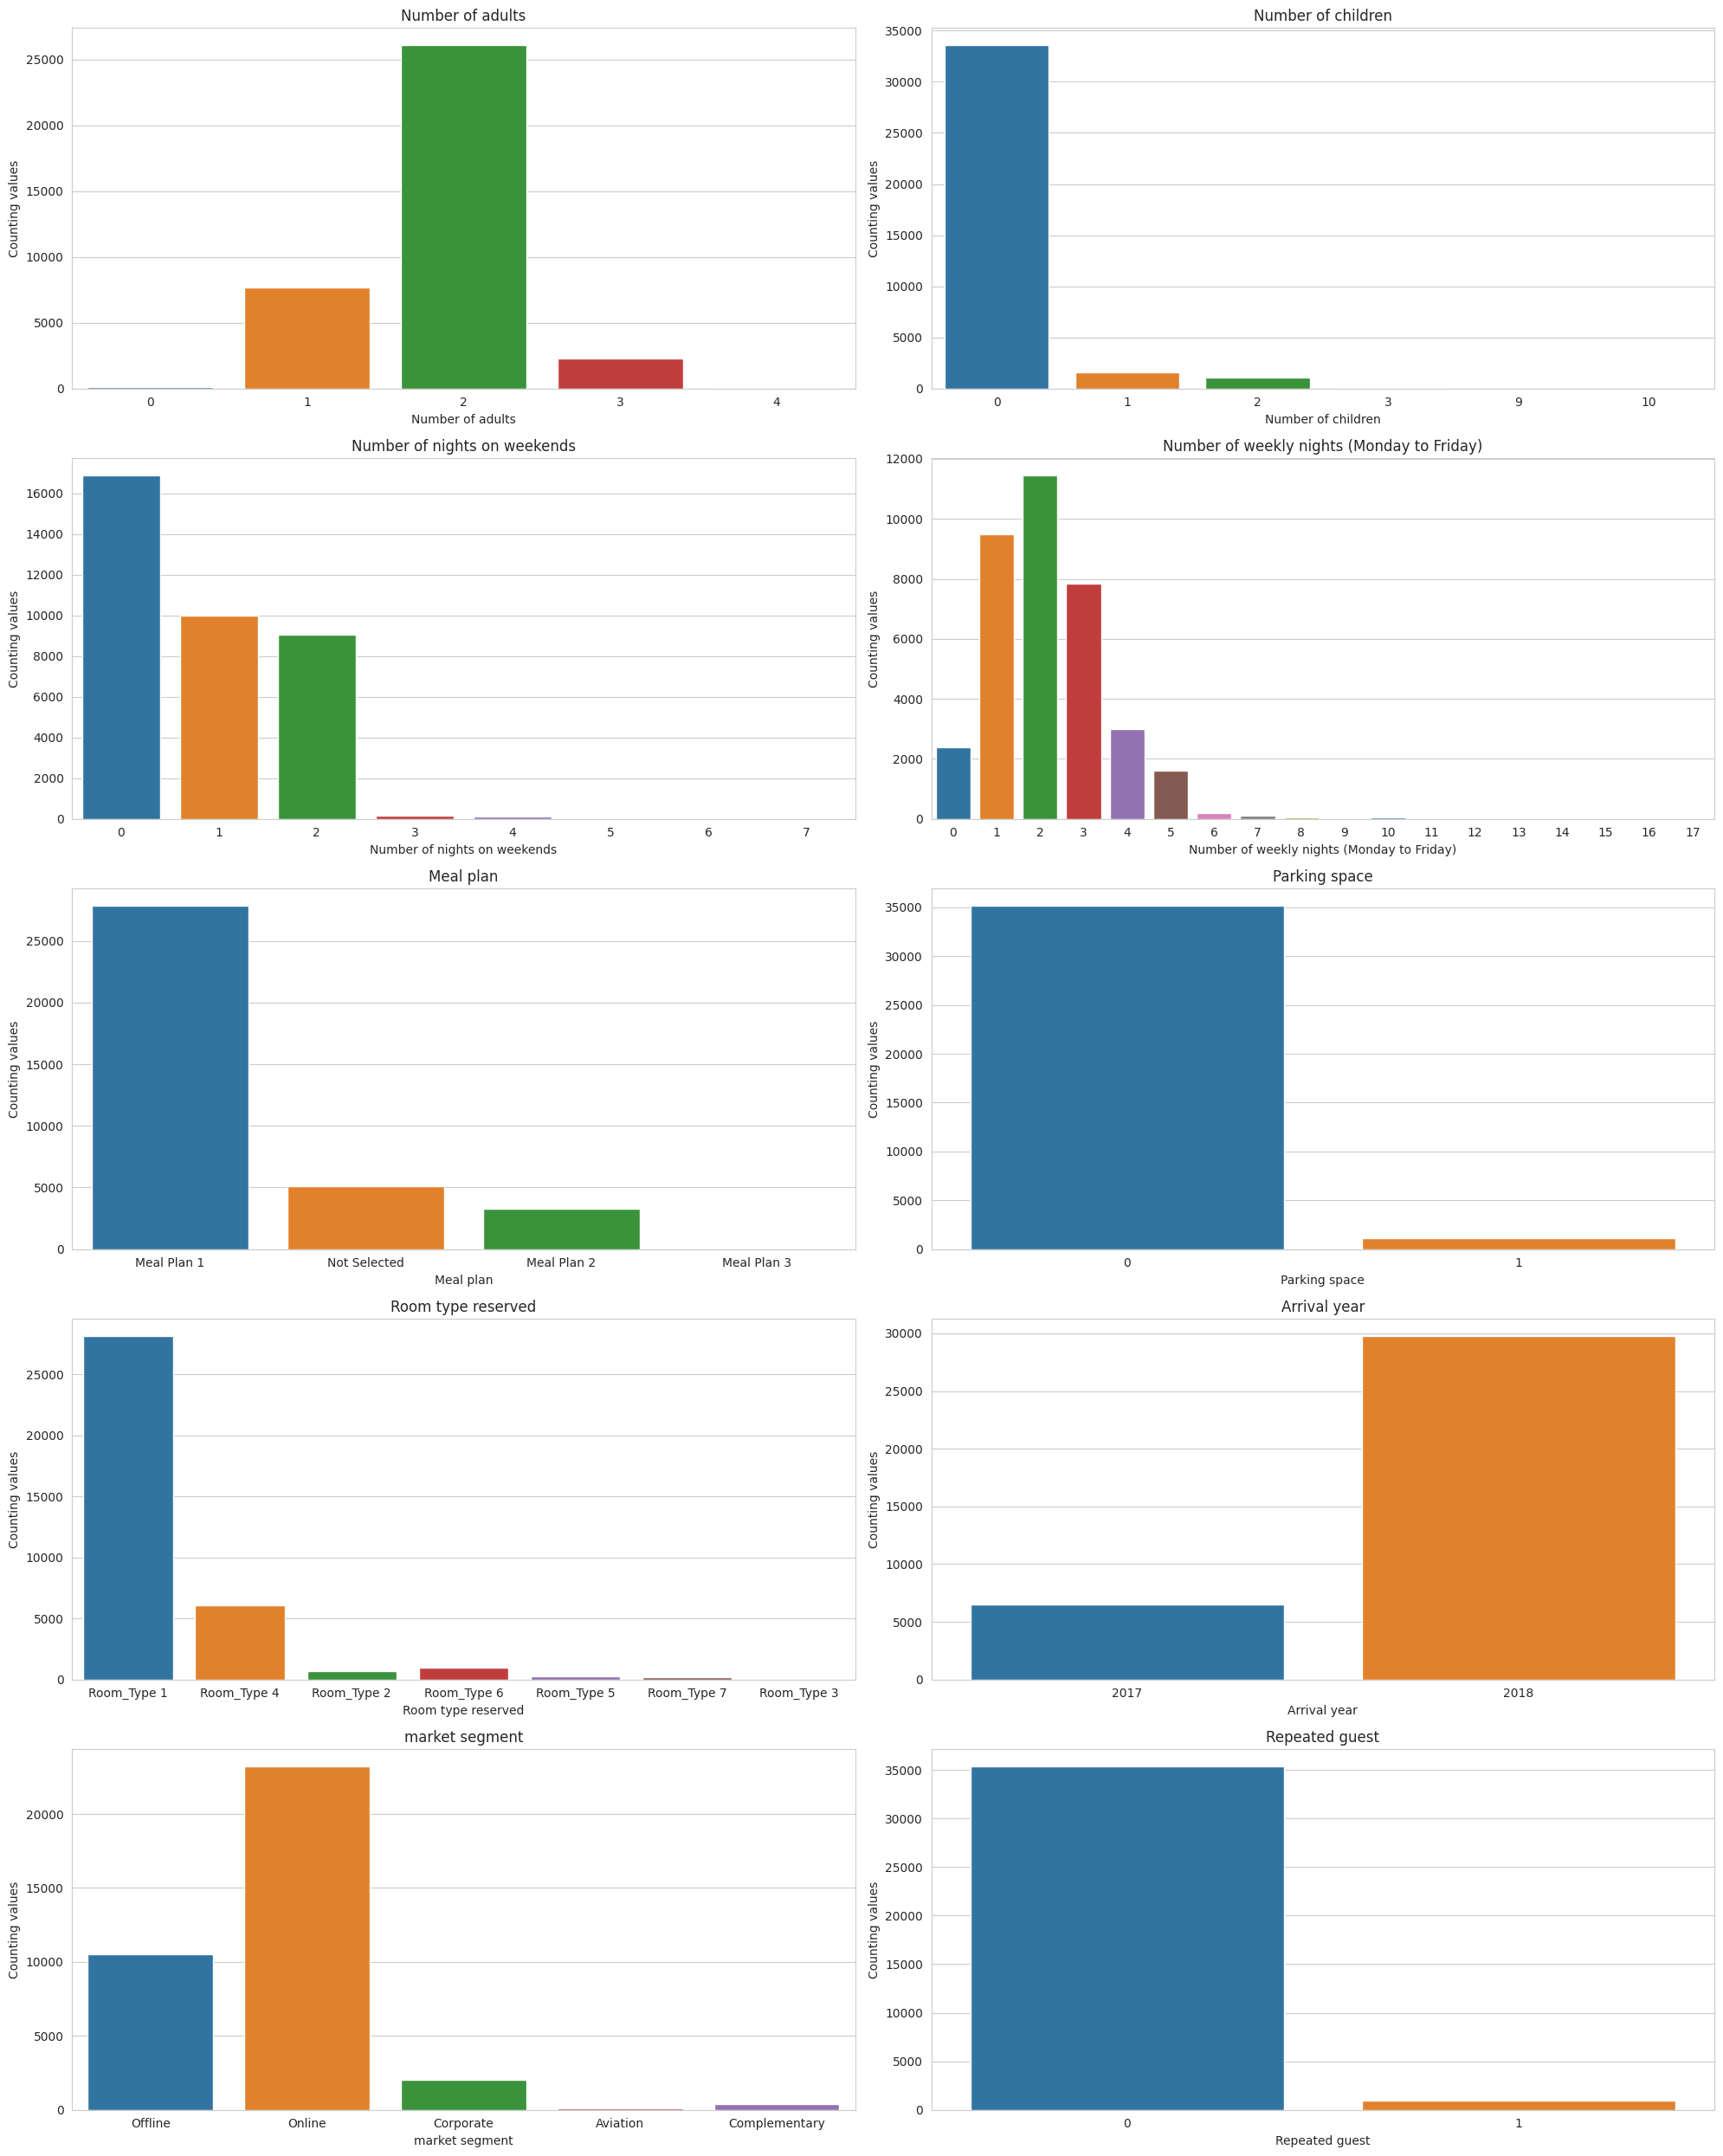

In [15]:
'''
# Some of the columns are technically integers but represent categories
categorical_columns = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
    'arrival_year', 'market_segment_type', 'repeated_guest',
]
'''

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a 5x2 subplot structure
plt.figure(figsize=(20, 25))

# Plot for 'no_of_adults'
plt.subplot(5, 2, 1)
plt.gca().set_title('Number of adults')
sns.countplot(x='no_of_adults', palette='tab10', data=hotel_reservations)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')

# Plot for 'no_of_children'
plt.subplot(5, 2, 2)
plt.gca().set_title('Number of children')
sns.countplot(x='no_of_children', palette='tab10', data=hotel_reservations)
plt.xlabel('Number of children')
plt.ylabel('Counting values')

# Plot for 'no_of_weekend_nights'
plt.subplot(5, 2, 3)
plt.gca().set_title('Number of nights on weekends')
sns.countplot(x='no_of_weekend_nights', palette='tab10', data=hotel_reservations)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')

# Plot for 'no_of_week_nights'
plt.subplot(5, 2, 4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sns.countplot(x='no_of_week_nights', palette='tab10', data=hotel_reservations)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')

# Plot for 'type_of_meal_plan'
plt.subplot(5, 2, 5)
plt.gca().set_title('Meal plan')
sns.countplot(x='type_of_meal_plan', palette='tab10', data=hotel_reservations)
plt.xlabel('Meal plan')
plt.ylabel('Counting values')

# Plot for 'required_car_parking_space'
plt.subplot(5, 2, 6)
plt.gca().set_title('Parking space')
sns.countplot(x='required_car_parking_space', palette='tab10', data=hotel_reservations)
plt.xlabel('Parking space')
plt.ylabel('Counting values')

# Plot for 'room_type_reserved'
plt.subplot(5, 2, 7)
plt.gca().set_title('Room type reserved')
sns.countplot(x='room_type_reserved', palette='tab10', data=hotel_reservations)
plt.xlabel('Room type reserved')
plt.ylabel('Counting values')

# Plot for 'arrival_year'
plt.subplot(5, 2, 8)
plt.gca().set_title('Arrival year')
sns.countplot(x='arrival_year', palette='tab10', data=hotel_reservations)
plt.xlabel('Arrival year')
plt.ylabel('Counting values')

# Plot for 'market_segment_type'
plt.subplot(5, 2, 9)
plt.gca().set_title('market segment')
sns.countplot(x='market_segment_type', palette='tab10', data=hotel_reservations)
plt.xlabel('market segment')
plt.ylabel('Counting values')

# Plot for 'repeated_guest'
plt.subplot(5, 2, 10)
plt.gca().set_title('Repeated guest')
sns.countplot(x='repeated_guest', palette='tab10', data=hotel_reservations)
plt.xlabel('Repeated guest')
plt.ylabel('Counting values')

plt.tight_layout()
plt.show()


numerical data

numerical_columns = [
    'lead_time', 'arrival_month', 'arrival_date',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests'
]

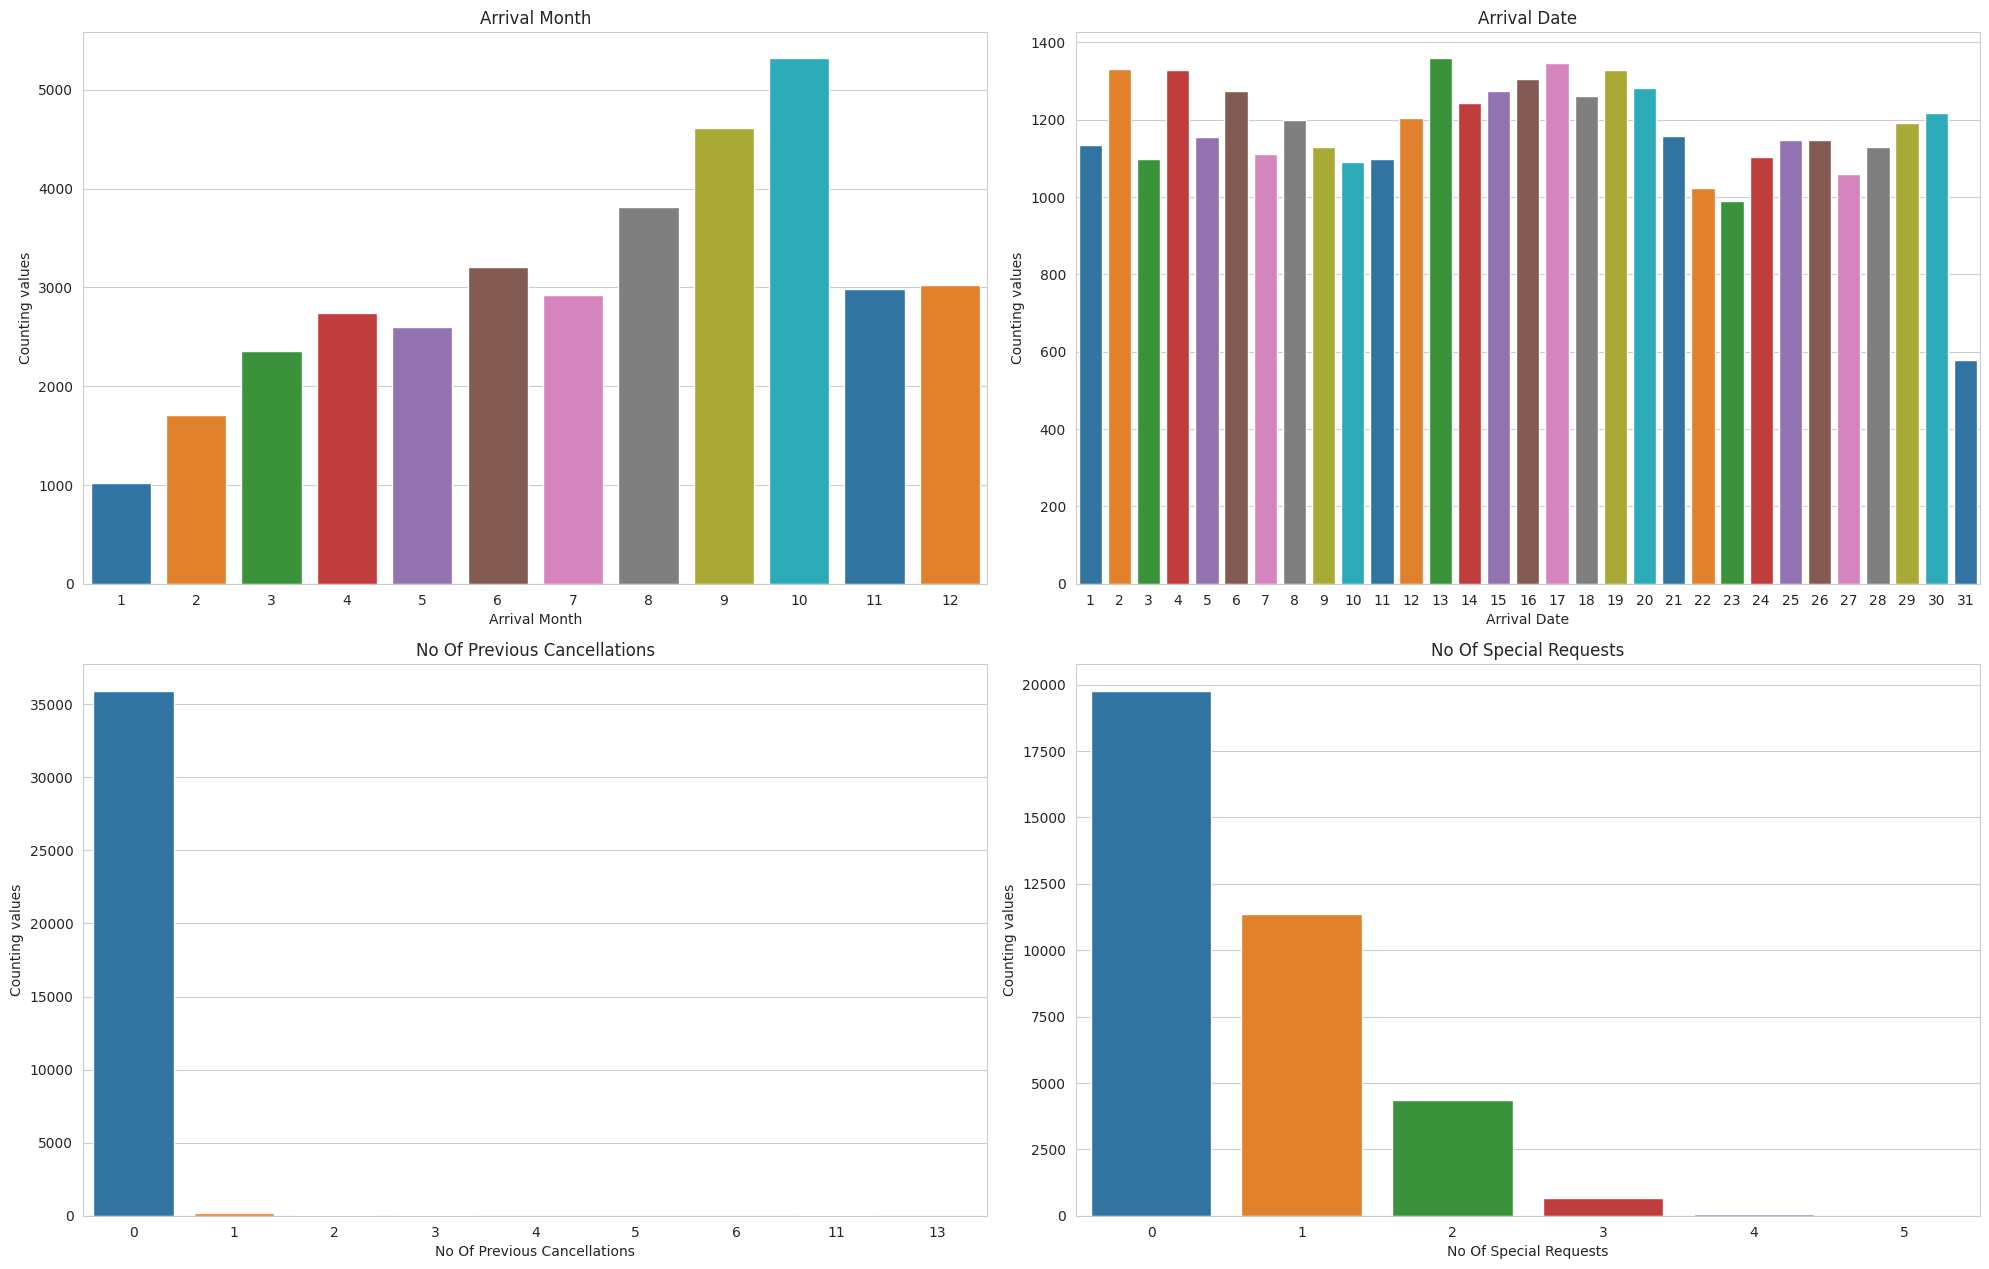

In [17]:
numerical_columns = [
    'arrival_month', 'arrival_date',
    'no_of_previous_cancellations', 'no_of_special_requests'
]

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a new figure with specified figure size
plt.figure(figsize=(20, 25))

# Creating a count plot for each numerical column using the specified format
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)
    plt.gca().set_title(col.replace('_', ' ').title())
    sns.countplot(x=col, palette='tab10', data=hotel_reservations)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Counting values')

plt.tight_layout()
plt.show()




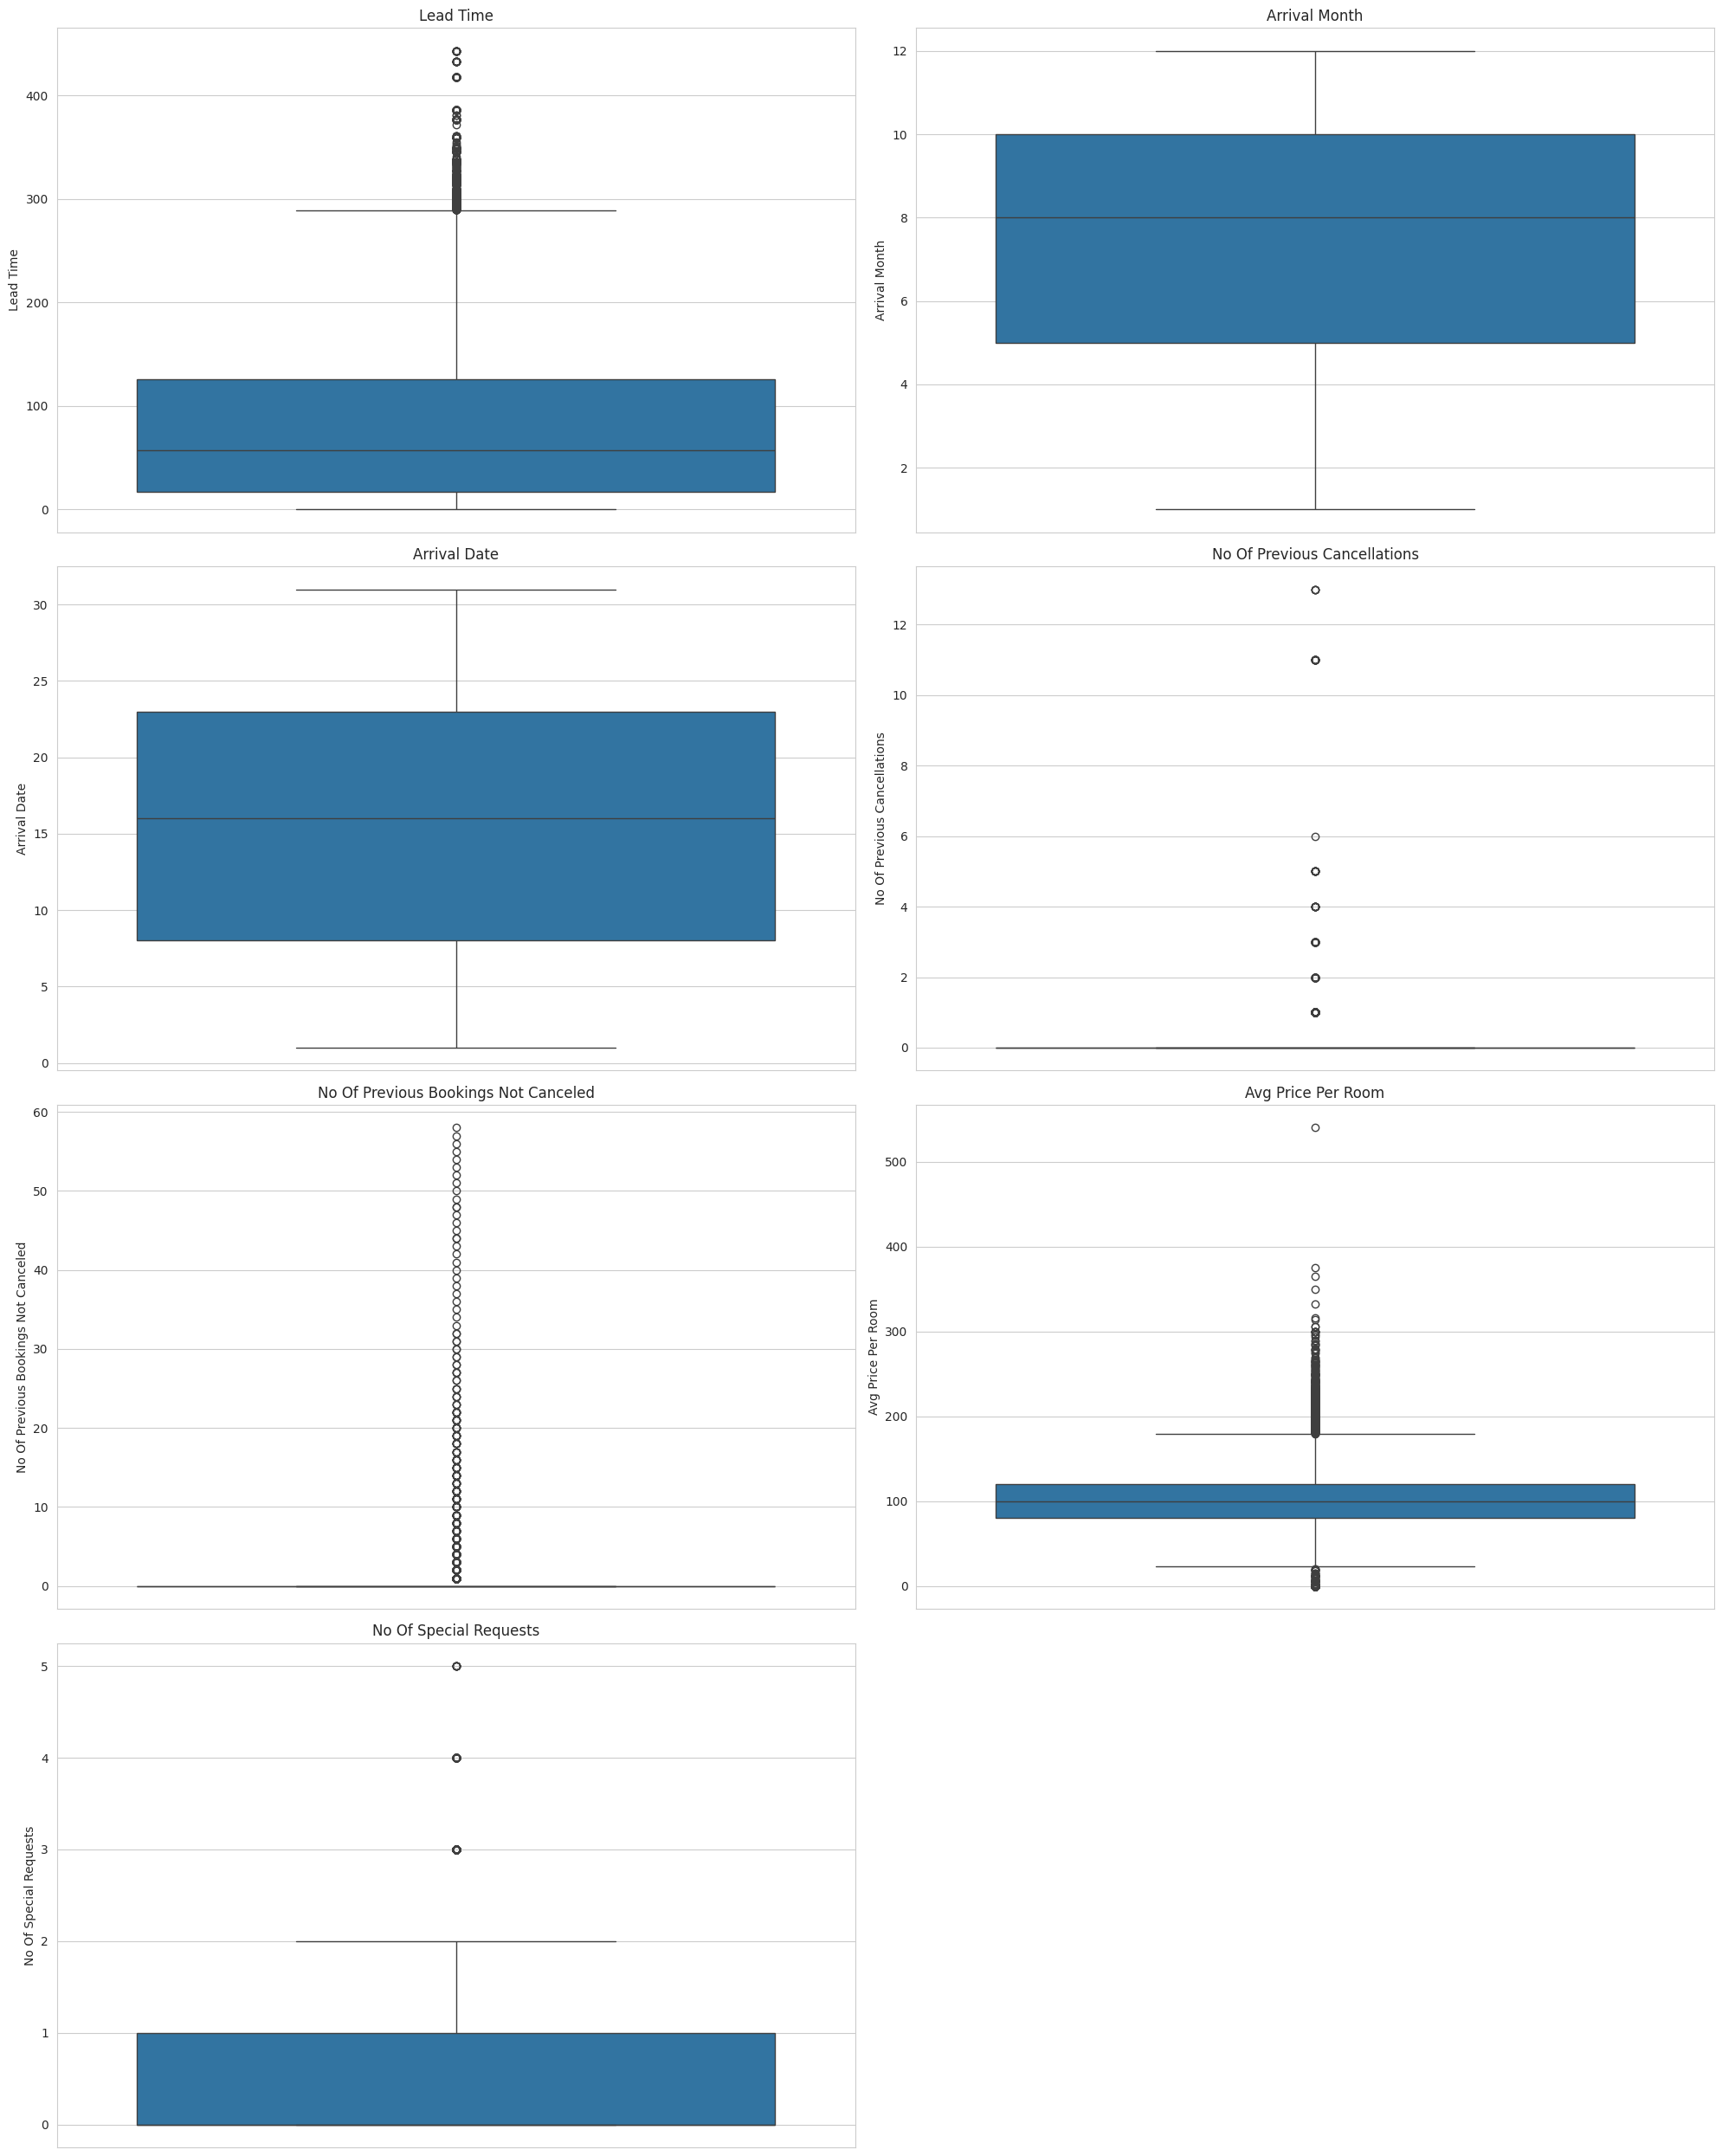

In [19]:
numerical_columns_box = [
    'lead_time', 'arrival_month', 'arrival_date',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests'
]

# Creating a new figure with specified figure size for boxplots
plt.figure(figsize=(20, 25))

# Creating a boxplot for each numerical column using the specified format
for i, col in enumerate(numerical_columns_box, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=col, data=hotel_reservations, palette='tab10')
    plt.title(col.replace('_', ' ').title())
    plt.ylabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


Drop columns

'Booking_ID', 'arrival_year', and 'arrival_date'



In [20]:
# Dropping 'Booking_ID', 'arrival_year', and 'arrival_date' columns, keeping 'arrival_month'
hr = hotel_reservations.drop(['Booking_ID', 'arrival_year', 'arrival_date'], axis=1)

# Displaying the first few rows of the dataframe to confirm the columns are dropped
hr.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,Online,0,0,0,94.50,0,Canceled


**convert the data to a numeric equivalent**

In [22]:
hr['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [23]:
hr['type_of_meal_plan'] = hr['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

In [24]:
hr['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [25]:
hr['room_type_reserved'] = hr['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

In [26]:
hr['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [27]:
hr['market_segment_type'] = hr['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

In [28]:
hr['booking_status'] = hr['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

In [29]:
hr.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,10,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,11,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,5,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,4,1,0,0,0,94.50,0,1


In [35]:
hr.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.949966,0.030986,1.708890,85.232557,7.423653,0.804604,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.480191,0.173281,1.399851,85.930817,3.069894,0.646881,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,5.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,8.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,10.000000,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,12.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


第一个子集：包括非旅游旺季的月份，可能是预订量较低的月份。例如，1月到4月。

第二个子集：包括旅游旺季的开始，可能是预订量开始增加的月份。例如，5月到8月。

第三个子集：包括旅游旺季的高峰，可能是预订量最高的月份。例如，9月到12月。

In [38]:
# Define the subset groups based on arrival_month
def assign_subset_group(month):
    if 1 <= month <= 4:
        return 'Subset 1'  # Non-peak season
    elif 5 <= month <= 8:
        return 'Subset 2'  # Start of peak season
    else:
        return 'Subset 3'  # Peak season

# Apply the function to the 'arrival_month' column to create 'subset_group' column
hr['subset_group'] = hr['arrival_month'].apply(assign_subset_group)

# Now, you can split the dataframe into three different subsets based on 'subset_group'
hr_1 = hr[hr['subset_group'] == 'Subset 1']
hr_2 = hr[hr['subset_group'] == 'Subset 2']
hr_3 = hr[hr['subset_group'] == 'Subset 3']

# If you need to work with these subsets separately, you can do so now.
# For instance, you can save them to new CSV files or process them as needed.
# Here's how you would get the first few rows of each subset to check:
#hr_1.head()
#hr_2.head()
hr_3.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,2,0,1,2,1,0,1,224,10,0,0,0,0,65.00,0,0,Subset 3
1,2,0,2,3,0,0,1,5,11,1,0,0,0,106.68,1,0,Subset 3
5,2,0,0,2,2,0,1,346,9,1,0,0,0,115.00,1,1,Subset 3
6,2,0,1,3,1,0,1,34,10,1,0,0,0,107.55,1,0,Subset 3
7,2,0,1,3,1,0,4,83,12,1,0,0,0,105.61,1,0,Subset 3


In [39]:
hr_1.to_csv('/content/drive/MyDrive/Data_mining PA2/hr_1.csv', index=False)
hr_2.to_csv('/content/drive/MyDrive/Data_mining PA2/hr_2.csv', index=False)
hr_3.to_csv('/content/drive/MyDrive/Data_mining PA2/hr_3.csv', index=False)

**standardize & normalize**

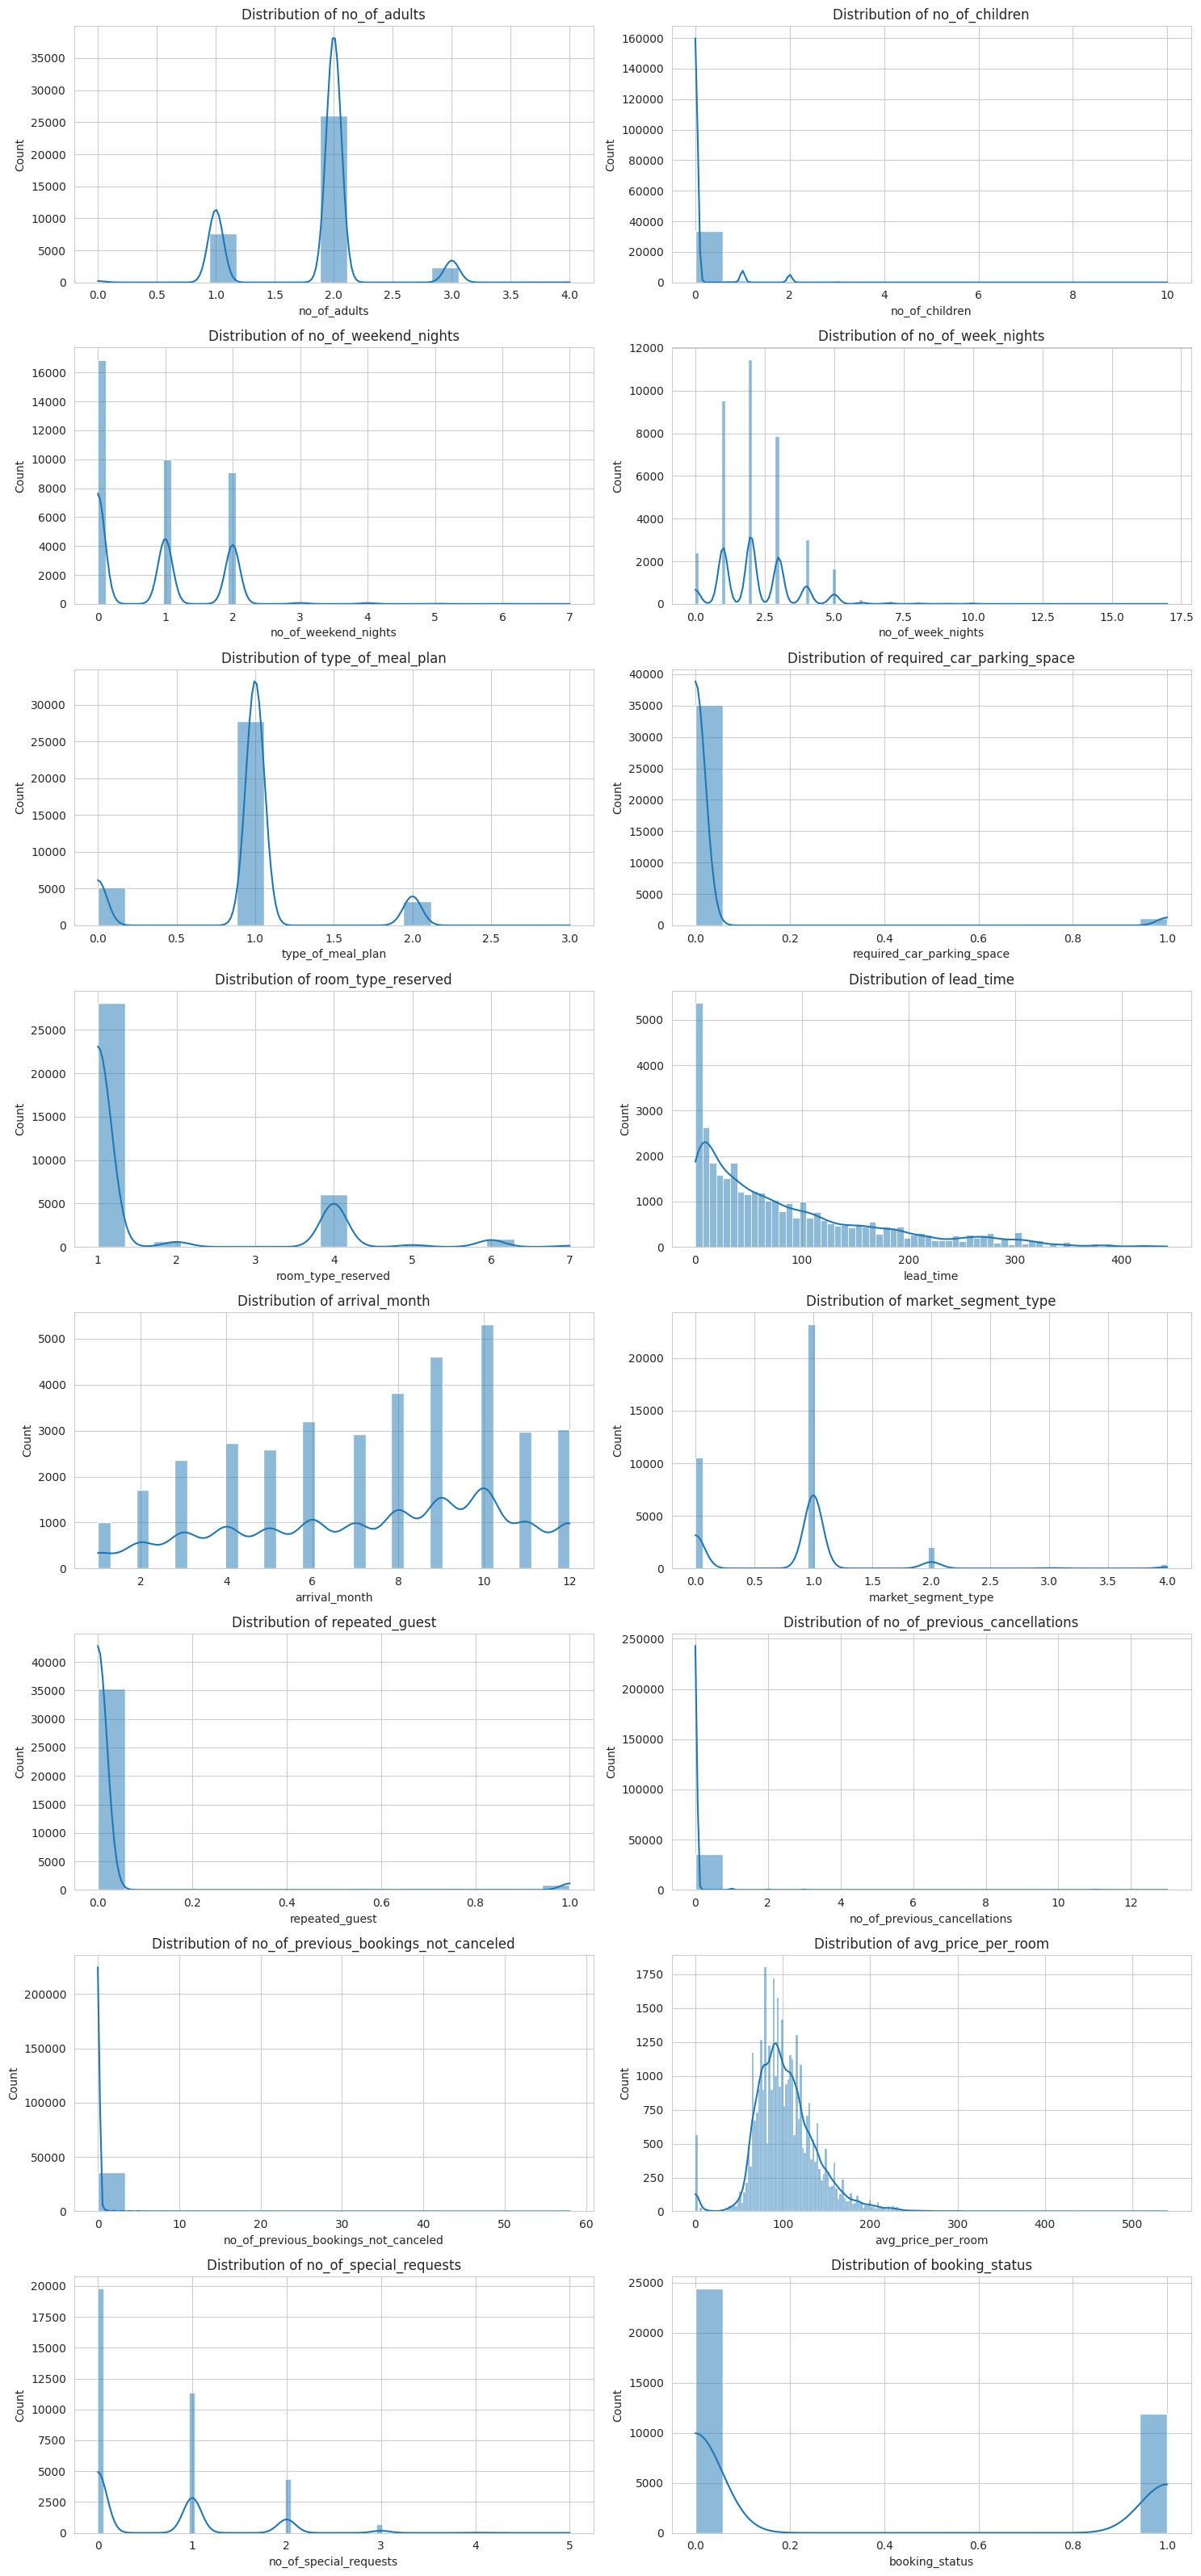

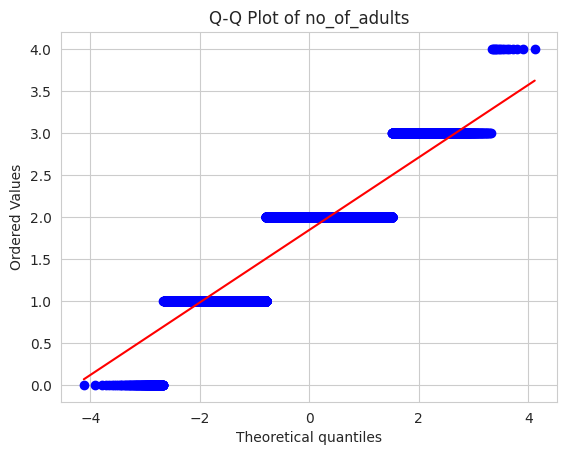

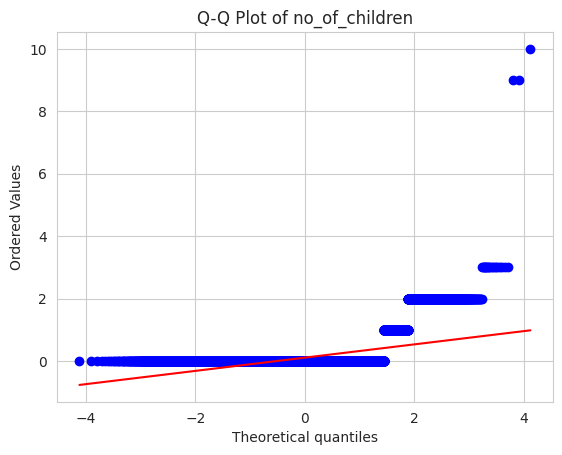

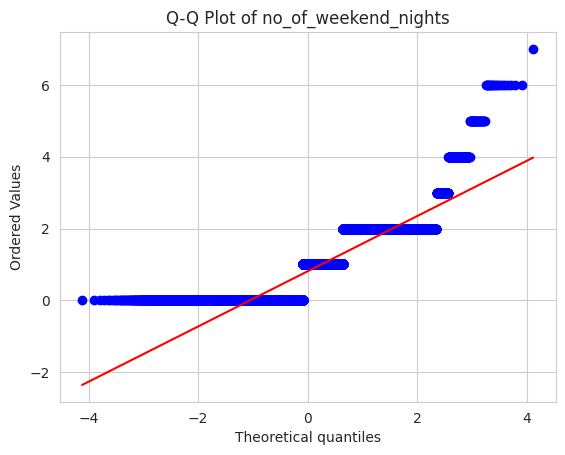

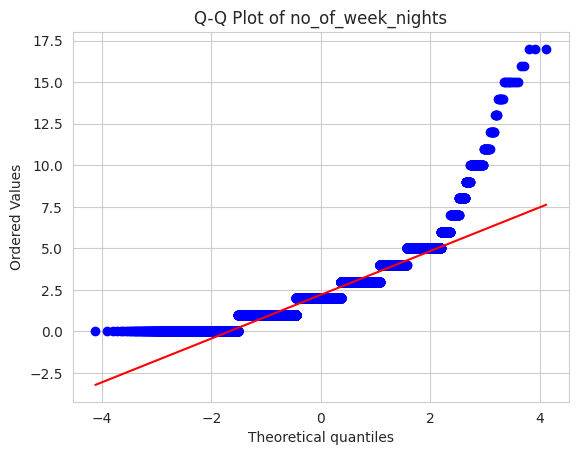

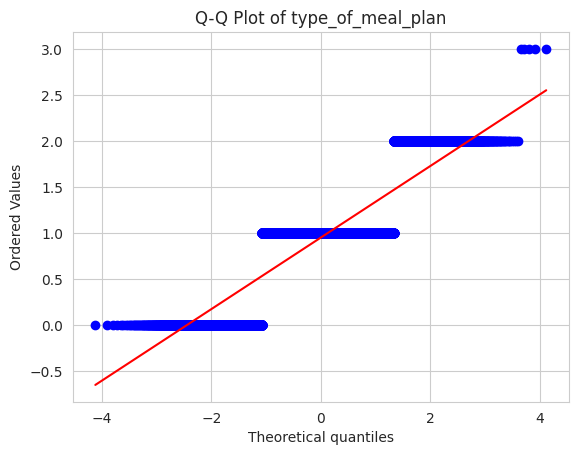

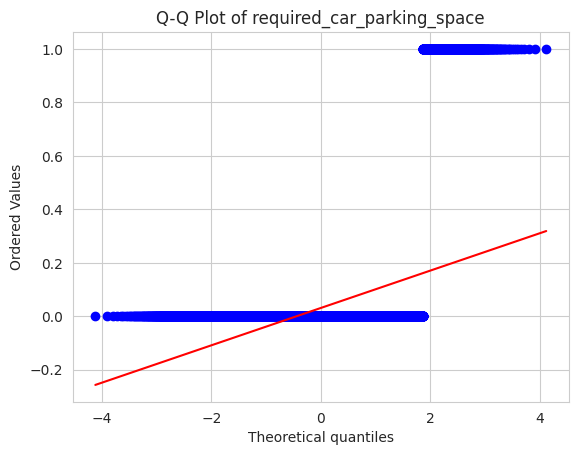

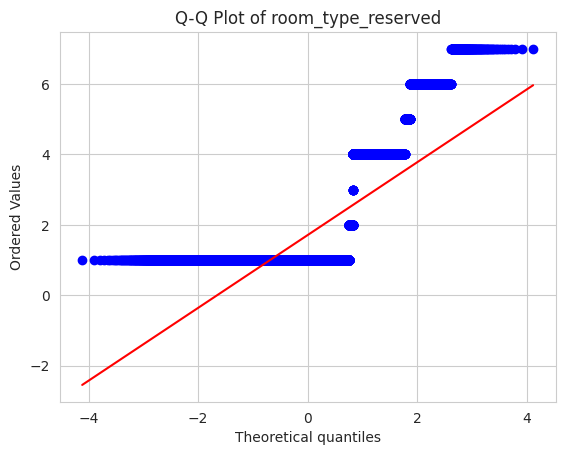

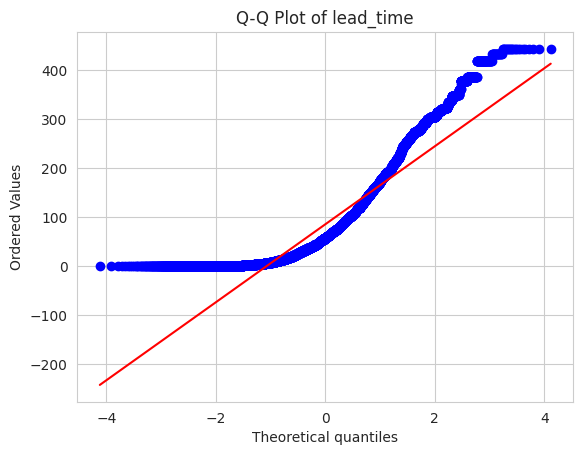

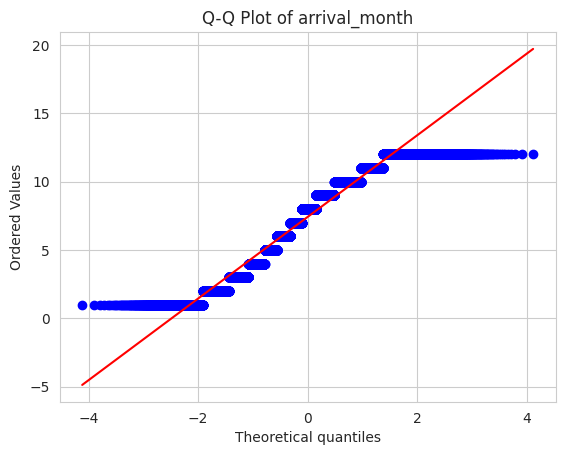

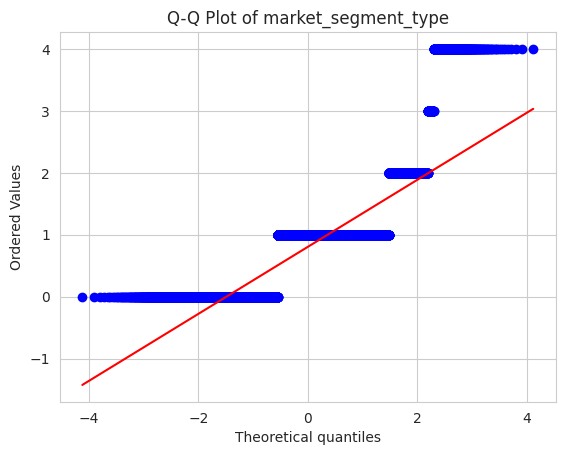

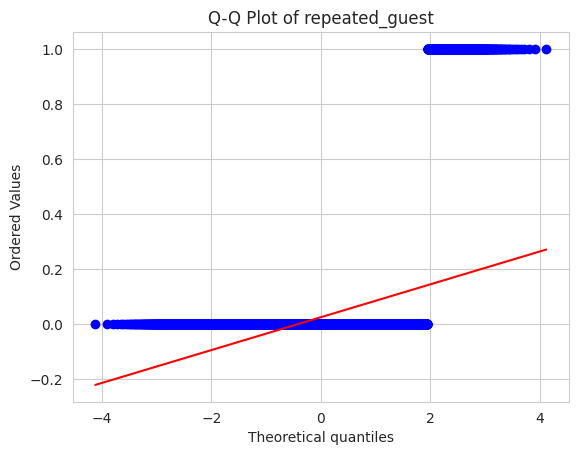

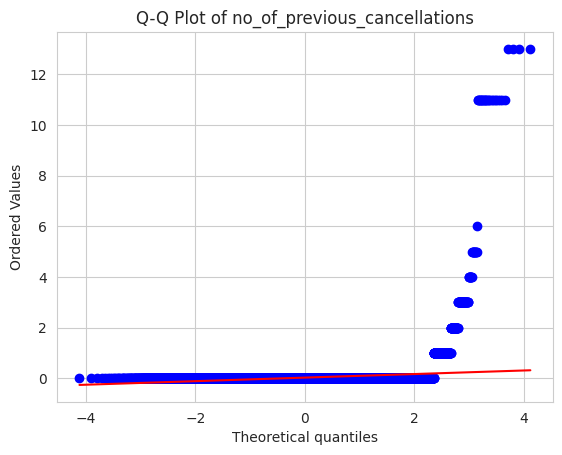

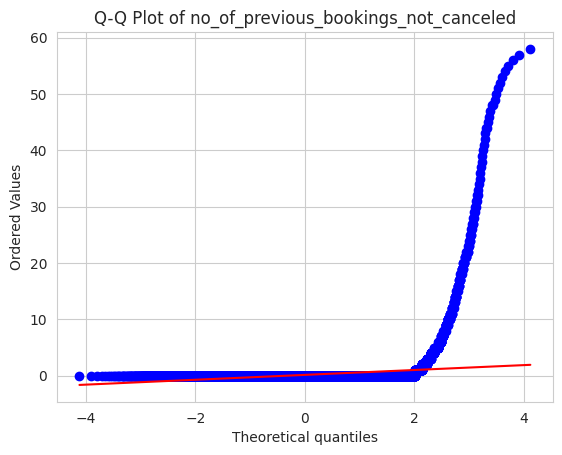

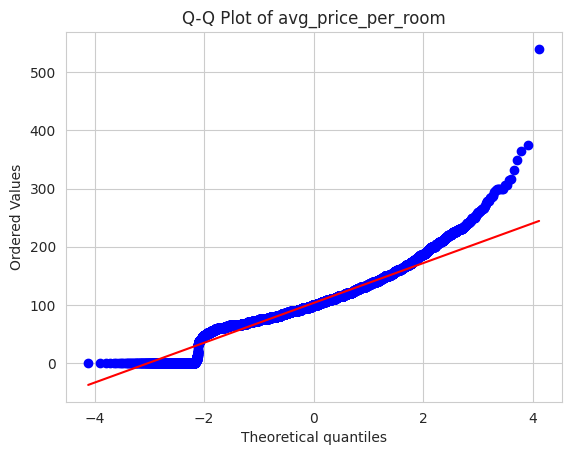

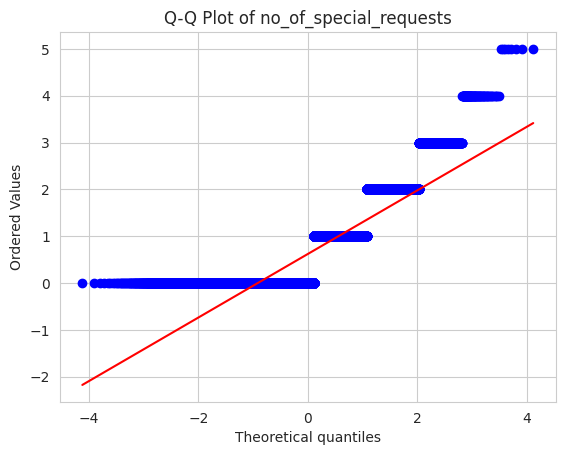

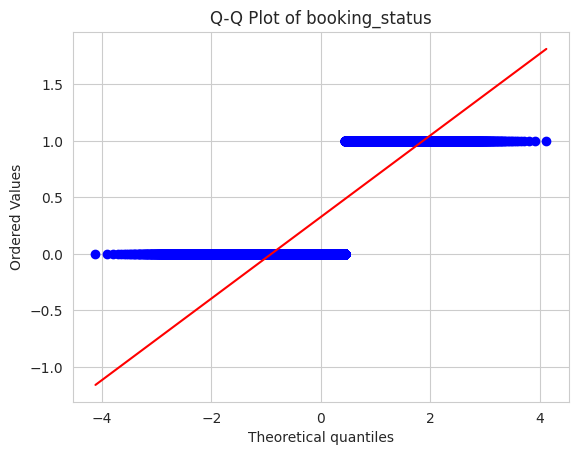

In [30]:
from scipy import stats

# 获取所有数值型特征的列名
numerical_features = hr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 设置绘图区域的大小
n_rows = len(numerical_features) // 2 + len(numerical_features) % 2
plt.figure(figsize=(15, 4 * n_rows))

# 遍历每个数值型特征
for i, col in enumerate(numerical_features):
    # 绘制直方图
    plt.subplot(n_rows, 2, i + 1)
    sns.histplot(hr[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# 绘制Q-Q图
for col in numerical_features:
    plt.figure()
    stats.probplot(hr[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.show()